# Model ARIMA

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [338]:
data = pd.read_csv('../Dataset/Dataset_Vietnam/Hue.csv')

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   province  4549 non-null   object 
 1   max       4549 non-null   int64  
 2   min       4549 non-null   int64  
 3   wind      4549 non-null   int64  
 4   wind_d    4549 non-null   object 
 5   rain      4549 non-null   float64
 6   humidi    4549 non-null   int64  
 7   cloud     4549 non-null   int64  
 8   pressure  4549 non-null   int64  
 9   date      4549 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 355.5+ KB


## 1 Kiểm tra và ổn định chuỗi thời gian
Để xác định một chuỗi thời gian có ổn định (stationary) hay không, ta thường kiểm tra xem chuỗi có thỏa mãn các điều kiện của tính ổn định không. Một chuỗi ổn định sẽ có các đặc điểm sau:

* Kỳ vọng không đổi: Giá trị trung bình của chuỗi không thay đổi theo thời gian.

* Phương sai không đổi: Độ phân tán quanh giá trị trung bình (phương sai) của chuỗi không thay đổi theo thời gian.

* Không có sự tự tương quan phụ thuộc thời gian: Tương quan giữa các giá trị ở các thời điểm khác nhau không phụ thuộc vào thời gian, tức là nó không có xu hướng hoặc chu kỳ rõ ràng.

### Quan sát trực quan bằng đồ thị

Đồ thị chuỗi thời gian: Vẽ đồ thị chuỗi thời gian và quan sát. Nếu chuỗi có xu hướng (tăng hoặc giảm dần) hoặc dao động với biên độ lớn theo thời gian, thì chuỗi có thể không ổn định.

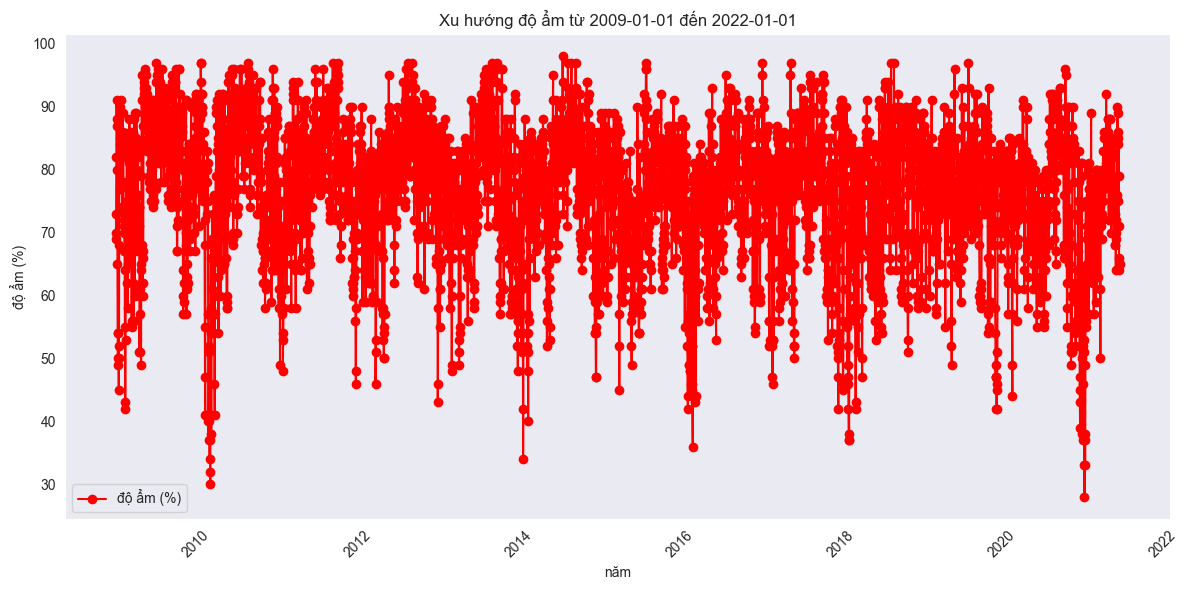

In [622]:
data = pd.read_csv('../Dataset/Dataset_Vietnam/Yen Bai.csv')
# Chuyển đổi cột ngày sang định dạng datetime
data['date'] = pd.to_datetime(data['date'])

# Sắp xếp dữ liệu theo ngày (nếu chưa sắp xếp)
data = data.sort_values(by='date')

# Lọc dữ liệu theo khoảng thời gian nhất định (chỉnh lại ngày theo nhu cầu)
start_date = '2009-01-01'
end_date = '2022-01-01'
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Vẽ biểu đồ xu hướng độ ẩm
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'], filtered_data['humidi'], marker='o', color='r', label='độ ẩm (%)')
plt.title(f"Xu hướng độ ẩm Yen Bai từ {start_date} đến {end_date}")
plt.xlabel("năm")
plt.ylabel("độ ẩm (%)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


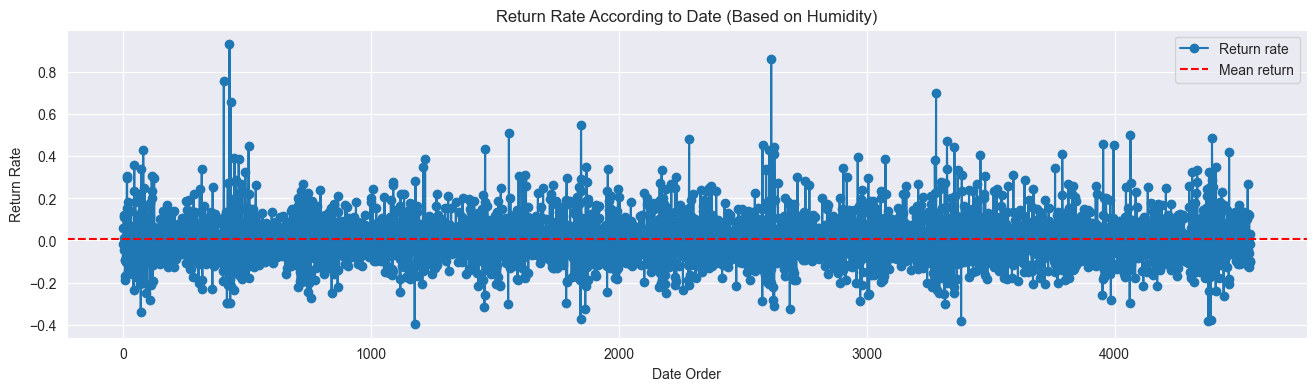

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu
file_path = '../Dataset/Dataset_Vietnam/Yen Bai.csv'
data = pd.read_csv(file_path, parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.sort_index()

# Tính lợi suất (return rate) từ cột 'max'
data['return_rate'] = data['humidi'].pct_change()  # Công thức: (P_t - P_{t-1}) / P_{t-1}
r_t = data['return_rate'].dropna()  # Loại bỏ giá trị NaN

# Tính giá trị trung bình của lợi suất
mean = r_t.mean()
# Vẽ biểu đồ lợi suất dựa trên 'humidi'
plt.figure(figsize=(16, 4))
plt.plot(np.arange(r_t.shape[0]), r_t, '-o', label='Return rate')
plt.axhline(y=mean, label='Mean return', color='red', linestyle='--')
plt.title('Return Rate According to Date (Based on Humidity)')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()
plt.show()



Biểu đồ lợi suất mà bạn đã vẽ có xu hướng dao động ngẫu nhiên quanh mức 0 và không có dấu hiệu rõ ràng của xu hướng tăng hoặc giảm. Điều này cho thấy chuỗi dữ liệu có thể là nhiễu trắng.
Vì vậy, d = 0 là lựa chọn hợp lý trong trường hợp này, vì chuỗi không có xu hướng cần sai phân.

Đồ thị tự tương quan (ACF): ACF giúp xem xét mối tương quan giữa các giá trị của chuỗi thời gian. Nếu đồ thị ACF giảm dần một cách chậm rãi và có sự tự tương quan đáng kể ở các độ trễ cao hơn, thì chuỗi có thể không ổn định. Đối với chuỗi ổn định, ACF sẽ giảm nhanh về 0 sau một số độ trễ.

<Figure size 1000x600 with 0 Axes>

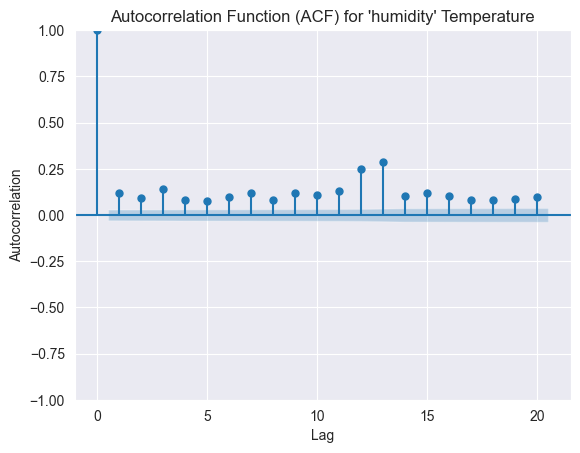

In [623]:
from statsmodels.graphics.tsaplots import plot_acf
data = pd.read_csv('../Dataset/Dataset_Vietnam/Yen Bai.csv')
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set 'date' as the index to treat it as a time series
data.set_index('date', inplace=True)

# Select 'humidity' column for ACF plot
time_series_data = data['humidi']

# Plot the Autocorrelation Function (ACF)
plt.figure(figsize=(10, 6))
plot_acf(time_series_data, lags=20)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF) for 'humidity' Temperature")
plt.show()


### Kiểm định bằng phương pháp thống kê

Kiểm định Dickey-Fuller mở rộng (Augmented Dickey-Fuller Test - ADF): Đây là một kiểm định phổ biến để kiểm tra tính ổn định của chuỗi. ADF kiểm định giả thuyết gốc (null hypothesis) là chuỗi không ổn định. Nếu giá trị p-value của kiểm định nhỏ hơn một mức ý nghĩa (thường là 0,05), ta có thể bác bỏ giả thuyết gốc và kết luận rằng chuỗi ổn định.

In [624]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on 'humidity' temperature data
adf_result = adfuller(time_series_data.dropna())

# Extract and organize the ADF test results
adf_output = {
    "ADF Statistic": adf_result[0],
    "p-value": adf_result[1],
    "Critical Values": adf_result[4],
    "Number of Lags Used": adf_result[2],
    "Number of Observations Used": adf_result[3]
}

adf_output


{'ADF Statistic': -4.424598966209888,
 'p-value': 0.0002684504816152428,
 'Critical Values': {'1%': -3.431798853166756,
  '5%': -2.862180221328312,
  '10%': -2.5671107931821586},
 'Number of Lags Used': 32,
 'Number of Observations Used': 4516}

Vì giá trị p-value (2.90) lớn hơn mức ý nghĩa thông thường (ví dụ: 0.05), nên ta không thể bác bỏ giả thuyết gốc (chuỗi không dừng). Điều này có nghĩa là chuỗi thời gian có khả năng không dừng. Để làm cho chuỗi trở nên dừng,có thể thử áp dụng sai phân

Kiểm định KPSS (Kwiatkowski-Phillips-Schmidt-Shin Test): Ngược lại với ADF, kiểm định KPSS có giả thuyết gốc là chuỗi ổn định. Nếu giá trị p-value của KPSS nhỏ hơn 0,05, ta có thể kết luận chuỗi có xu hướng không ổn định.

In [530]:
from statsmodels.tsa.stattools import kpss

# Perform the Augmented Dickey-Fuller test on 'humidity' temperature data
kpss_result_humidi = kpss(time_series_data.dropna())

# Extract and organize the ADF test results
KPSS_output = {
    "KPSS Statistic:": kpss_result_humidi[0],
    "p-value": kpss_result_humidi[1],
    "Critical Values": kpss_result_humidi[3],
    "Number of Lags Used": kpss_result_humidi[2],
}

KPSS_output


C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_19268\3672092852.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result_humidi = kpss(time_series_data.dropna())


{'KPSS Statistic:': 2.8920705428390123,
 'p-value': 0.01,
 'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739},
 'Number of Lags Used': 25}

### Kiểm tra tính ổn định của phương sai

Kiểm định phương sai không đổi (Homoscedasticity Test): Để kiểm tra phương sai có ổn định hay không, ta có thể dùng các kiểm định như Levene’s test hoặc Bartlett’s test. Nếu phương sai thay đổi theo thời gian, chuỗi không ổn định.

In [531]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Chuẩn bị dữ liệu: ví dụ 'humidi' là biến phụ thuộc, 'date' là biến độc lập
data['date_ordinal'] = data.index.map(lambda date: date.toordinal())  # chuyển ngày thành số nguyên
X = sm.add_constant(data['date_ordinal'])  # Thêm hằng số để chạy hồi quy tuyến tính
y = data['humidi']

# Chạy hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Kiểm định Breusch-Pagan
bp_test = het_breuschpagan(model.resid, X)

# Kết quả kiểm định
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
results = dict(zip(labels, bp_test))
print(results)


{'Lagrange multiplier statistic': 0.2581792070434933, 'p-value': 0.6113738323386367, 'f-value': 0.2580803441207843, 'f p-value': 0.6114667043474602}


### Lấy sai phân để làm ổn định chuỗi

* Nếu chuỗi không ổn định, ta có thể lấy sai phân (difference) giữa các giá trị để loại bỏ xu hướng. Thực hiện phép lấy sai phân một hoặc nhiều lần có thể giúp chuỗi trở nên ổn định.
* Sau khi lấy sai phân, kiểm tra lại đồ thị và thực hiện các kiểm định ổn định như ADF hoặc KPSS để đảm bảo chuỗi đã ổn định.

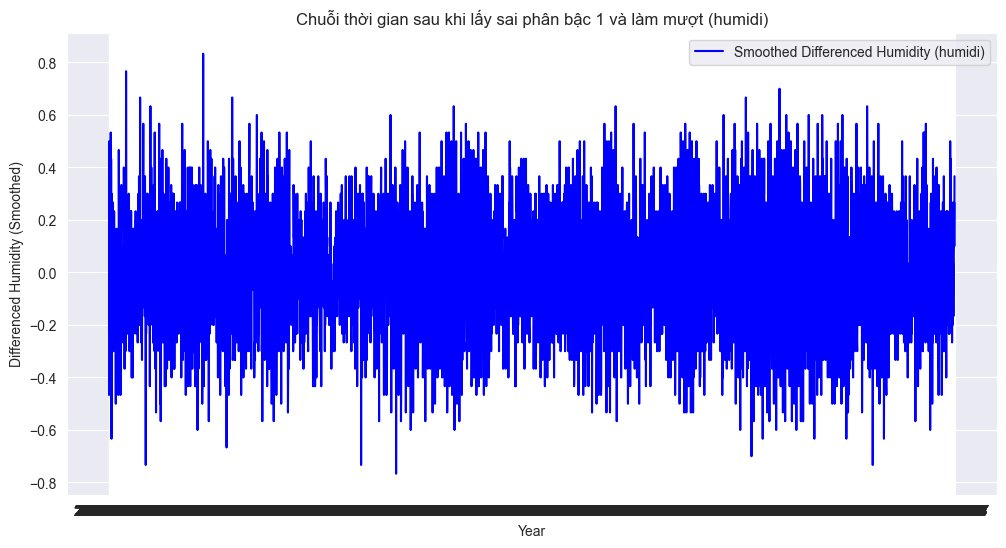

In [403]:
import matplotlib.pyplot as plt

data = pd.read_csv('../Dataset/Dataset_Vietnam/Vung Tau.csv')
# Đặt cột 'date' làm chỉ mục
data.set_index('date', inplace=True)

# Lấy sai phân bậc 1 cho cột 'humidi'
humidi_diff = data['humidi'].diff().dropna()

# Làm mượt chuỗi đã lấy sai phân bằng trung bình trượt 30 ngày
humidi_diff_smooth = humidi_diff.rolling(window=30).mean().dropna()

# Vẽ chuỗi đã được làm mượt
plt.figure(figsize=(12, 6))
plt.plot(humidi_diff_smooth, color='blue', label='Smoothed Differenced Humidity (humidi)')
plt.title("Chuỗi thời gian sau khi lấy sai phân bậc 1 và làm mượt (humidi)")
plt.xlabel("Year")
plt.ylabel("Differenced Humidity (Smoothed)")
plt.legend()
plt.show()

In [404]:
from statsmodels.tsa.stattools import adfuller

# Kiểm định ADF cho chuỗi đã lấy sai phân
adf_result_diff = adfuller(humidi_diff)

# Kết quả kiểm định ADF
print("ADF Statistic:", adf_result_diff[0])
print("p-value:", adf_result_diff[1])
print("Critical Values:", adf_result_diff[4])

ADF Statistic: -20.172555040429742
p-value: 0.0
Critical Values: {'1%': -3.431798853166756, '5%': -2.862180221328312, '10%': -2.5671107931821586}


Nếu p-value nhỏ hơn 0.05, chuỗi sau khi lấy sai phân có thể được coi là dừng.

##  2 Dùng ACF và PACF để xác định các tham số d,p,q


Xác định giá trị \( p \), \( d \), và \( q \) trong mô hình ARIMA là một bước quan trọng và cần thiết để xây dựng mô hình dự báo chính xác. Dưới đây là các phương pháp cụ thể để xác định các giá trị này:

### **Xác định giá trị \( d \) (Bậc sai phân)**
   - Giá trị \( d \) cho biết số lần cần lấy sai phân để làm ổn định chuỗi thời gian.
   - Để xác định \( d \), bạn có thể thực hiện các bước sau:
     1. **Kiểm tra tính ổn định**: Bằng cách vẽ đồ thị chuỗi thời gian hoặc sử dụng kiểm định ADF (Augmented Dickey-Fuller test). Nếu chuỗi không ổn định, bạn có thể thử lấy sai phân.
     2. **Lấy sai phân**: Nếu chuỗi vẫn không ổn định sau lần lấy sai phân thứ nhất ( \( d = 1 \) ), có thể thử lấy sai phân thêm một lần nữa ( \( d = 2 \) ). Thông thường, chuỗi sẽ ổn định sau khi lấy sai phân 1-2 lần.
     3. **Xác nhận tính ổn định**: Sau khi lấy sai phân, kiểm tra lại tính ổn định của chuỗi bằng cách dùng kiểm định ADF hoặc quan sát đồ thị. Khi chuỗi đã ổn định, giá trị \( d \) là số lần lấy sai phân đã thực hiện.



**Vì ta đã tìm ra sai phân bằng cách ổn định chuỗi rồi d=1 nên ta sẽ bỏ qua bước này**


###  **Xác định giá trị \( p \) (Bậc của thành phần AR)**
   - Giá trị \( p \) là số lượng các giá trị trễ (giá trị của các thời điểm trước đó) được sử dụng trong mô hình tự hồi quy AR.
   - Để xác định \( p \), bạn có thể dựa vào **đồ thị tự tương quan từng phần (PACF - Partial Autocorrelation Function)**:
     - Quan sát đồ thị PACF của chuỗi đã được lấy sai phân ổn định. Nếu tại một số độ trễ \( k \), hệ số tương quan từng phần rơi nhanh về 0, thì đó có thể là giá trị \( p \).
     - Ví dụ: Nếu PACF có giá trị đáng kể cho đến độ trễ thứ 2 rồi giảm về 0, bạn có thể chọn \( p = 2 \).


<Figure size 1000x600 with 0 Axes>

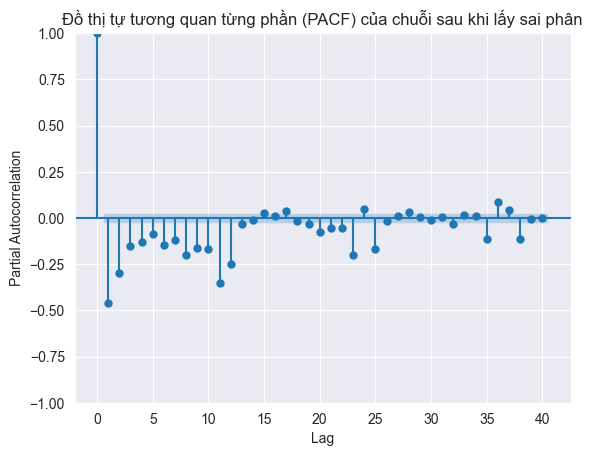

In [405]:
from statsmodels.graphics.tsaplots import plot_pacf
# Vẽ đồ thị PACF cho chuỗi đã lấy sai phân
plt.figure(figsize=(10, 6))
plot_pacf(humidi_diff, lags=40)  # Vẽ PACF với tối đa 40 độ trễ
plt.title("Đồ thị tự tương quan từng phần (PACF) của chuỗi sau khi lấy sai phân")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.show()

**Vì độ trễ ở đây chạm tới 0 khi p = 5 nên ta sẽ lấy đây làm tham số**


###  **Xác định giá trị \( q \) (Bậc của thành phần MA)**
   - Giá trị \( q \) là số lượng các sai số trễ trong quá khứ được dùng trong mô hình trung bình trượt MA.
   - Để xác định \( q \), bạn có thể dựa vào **đồ thị tự tương quan (ACF - Autocorrelation Function)**:
     - Quan sát đồ thị ACF của chuỗi đã được lấy sai phân ổn định. Nếu tại một số độ trễ \( k \), hệ số tự tương quan giảm nhanh về 0, thì đó có thể là giá trị \( q \).
     - Ví dụ: Nếu ACF có giá trị đáng kể cho đến độ trễ thứ 1 rồi giảm về 0, bạn có thể chọn \( q = 1 \).


<Figure size 1000x600 with 0 Axes>

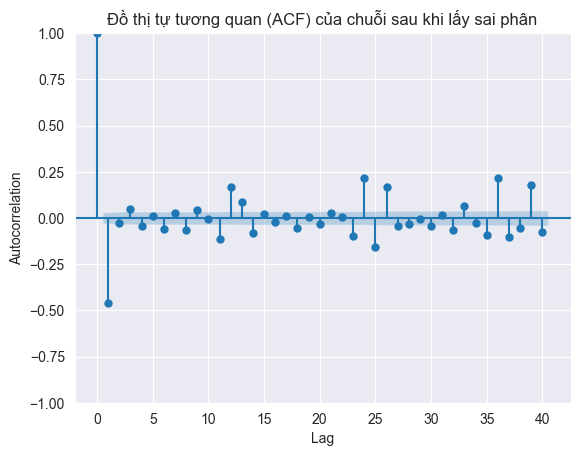

In [406]:
from statsmodels.graphics.tsaplots import plot_acf
# Vẽ đồ thị ACF cho chuỗi đã lấy sai phân
plt.figure(figsize=(10, 6))
plot_acf(humidi_diff, lags=40)  # Vẽ ACF với tối đa 40 độ trễ
plt.title("Đồ thị tự tương quan (ACF) của chuỗi sau khi lấy sai phân")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

**Vì độ trễ ở đây chạm tới 0 khi q = 1 nên ta sẽ lấy tham số này**

## 3 Xây dựng mô hình ARIMA với các giá trị tìm được và kiểm tra độ chính xác của nó

## Mô hình Lấy sai phân

## Mô hình tính toán ngày tháng khi lấy sai phân

Ngày đầu tiên trong dữ liệu: 2009-01-01 00:00:00
Ngày cuối cùng trong dữ liệu: 2021-06-18 00:00:00


C:\Users\GIGABYTE\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\GIGABYTE\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\GIGABYTE\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                 humidi   No. Observations:                 4522
Model:                ARIMA(13, 1, 4)   Log Likelihood                1688.649
Date:                Fri, 15 Nov 2024   AIC                          -3341.299
Time:                        17:07:40   BIC                          -3225.802
Sample:                    01-31-2009   HQIC                         -3300.612
                         - 06-18-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3269      0.029     11.315      0.000       0.270       0.384
ar.L2         -0.2007      0.035     -5.708      0.000      -0.270      -0.132
ar.L3         -0.5333      0.038    -14.164      0.0

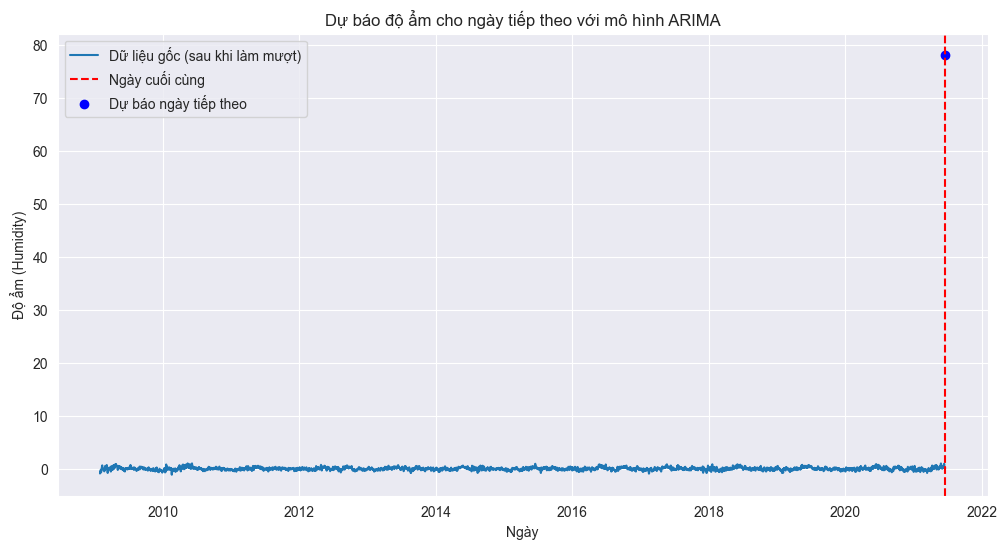

Mô hình ARIMA và thông tin đã được lưu thành công!


In [402]:
import joblib
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('../Dataset/Dataset_Vietnam/Vung Tau.csv', parse_dates=['date'])

# Thiết lập index là cột 'date' và sắp xếp theo thứ tự thời gian
data.set_index('date', inplace=True)
data = data.sort_index()

# Kiểm tra thông tin dữ liệu
print(f"Ngày đầu tiên trong dữ liệu: {data.index.min()}")
print(f"Ngày cuối cùng trong dữ liệu: {data.index.max()}")

# Kiểm tra xem có ngày nào bị thiếu không và điền dữ liệu thiếu nếu cần thiết
data = data.asfreq('D', method='pad')  # 'pad' sẽ điền dữ liệu thiếu bằng giá trị gần nhất

# Tạo chuỗi sai phân bậc 1 và làm mượt bằng trung bình trượt 30 ngày
humidi_diff = data['humidi'].diff().dropna()
humidi_diff_smooth = humidi_diff.rolling(window=30).mean().dropna()

# Đặt các giá trị p, d, q
p = 5  # Số bậc AR (Auto-Regressive)
d = 1   # Số lần sai phân (Difference)
q = 1  # Số bậc MA (Moving Average)

# Xây dựng mô hình ARIMA mà không cần chỉ định 'freq' nữa
model = ARIMA(humidi_diff_smooth, order=(p, d, q))
model_fit = model.fit()

# In kết quả mô hình ARIMA
print(model_fit.summary())

# Dự báo giá trị sai phân cho ngày tiếp theo
forecast_diff = model_fit.forecast(steps=1)
forecast_diff.index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=1, freq='D')

# Tích hợp lại để có giá trị độ ẩm dự báo
last_humidi_value = data['humidi'].iloc[-1]
forecast_humidi = last_humidi_value + forecast_diff.iloc[0]

# Lấy ngày cuối cùng và ngày dự báo tiếp theo
last_date = data.index[-1]
next_day = forecast_diff.index[0]

# In kết quả dự báo
print(f"Ngày cuối cùng trong dữ liệu: {last_date}")
print(f"Ngày dự báo tiếp theo: {next_day.strftime('%Y-%m-%d')}")
print(f"Dự báo độ ẩm cho ngày {next_day.strftime('%Y-%m-%d')}: {forecast_humidi:.2f}")

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(humidi_diff_smooth, label="Dữ liệu gốc (sau khi làm mượt)")
plt.axvline(x=last_date, color='red', linestyle='--', label="Ngày cuối cùng")
plt.scatter(next_day, forecast_humidi, color='blue', label="Dự báo ngày tiếp theo")
plt.title("Dự báo độ ẩm cho ngày tiếp theo với mô hình ARIMA")
plt.xlabel("Ngày")
plt.ylabel("Độ ẩm (Humidity)")
plt.legend()
plt.show()

# Lưu mô hình ARIMA và thông tin liên quan
model_data = {
    "model": model_fit,
    "last_humidi_value": last_humidi_value,
    "last_date": pd.Timestamp(last_date)
}

joblib.dump(model_data, '../Model/Model_Vietnam/Time_Series_Analysis_model/Vung_Tau_arima.pkl')
print("Mô hình ARIMA và thông tin đã được lưu thành công!")


In [211]:
# Tải lại mô hình ARIMA và thông tin từ tệp
model_data = joblib.load('../Model/Model_Vietnam/Time_Series_Analysis_model/Yen_Bai_arima.pkl')

# Truy xuất các thông tin đã lưu
model_fit = model_data["model"]
last_humidi_value = model_data["last_humidi_value"]
last_date = model_data["last_date"]

print(f"Ngày cuối cùng: {last_date}")
print(f"Giá trị độ ẩm cuối cùng: {last_humidi_value}")

Ngày cuối cùng: 2021-06-18 00:00:00
Giá trị độ ẩm cuối cùng: 65


In [212]:
# Đảm bảo dữ liệu và chỉ mục thời gian hợp lệ
data.index = pd.to_datetime(data.index)

# Kiểm tra chỉ mục thời gian
print(data.index)


DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
               '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18'],
              dtype='datetime64[ns]', name='date', length=4549, freq=None)


Mean Absolute Error (MAE): 5.36
Root Mean Square Error (RMSE): 7.17


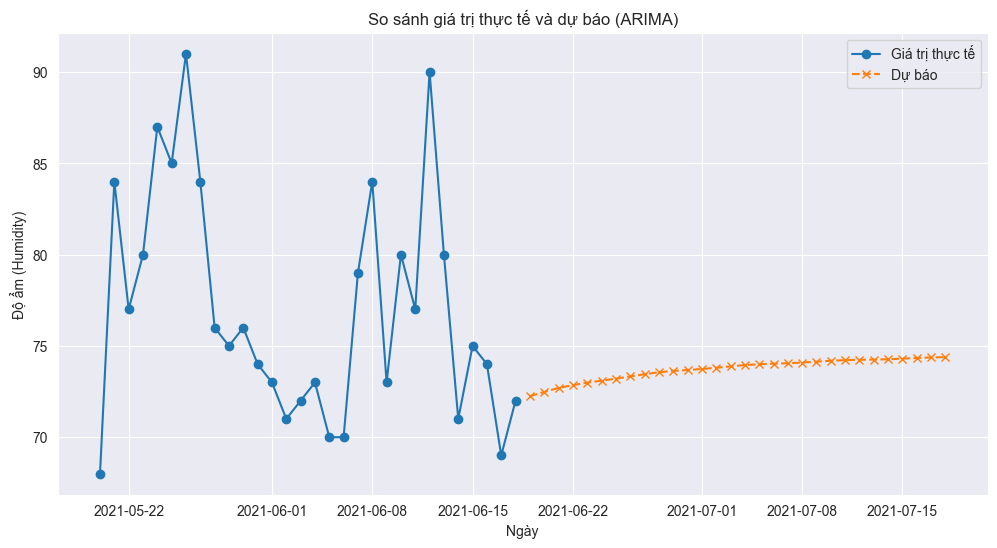

In [26]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Đường dẫn đến file mô hình đã lưu
model_path = '../Model/Model_Vietnam/Time_Series_Analysis_model/Bac_Lieu_arima.pkl'

# Tải mô hình đã lưu
model_data = joblib.load(model_path)
model = model_data["model"]
last_humidi_value = model_data["last_humidi_value"]
last_date = model_data["last_date"]

# Đọc dữ liệu thực tế
data = pd.read_csv('../Dataset/Dataset_Vietnam/Bac Lieu.csv', parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.sort_index()

# Chọn khoảng dữ liệu kiểm tra (ví dụ: 30 ngày gần nhất)
actual_values = data['humidi'].iloc[-30:]

# Dự báo 30 ngày tiếp theo
forecast_diff = model.forecast(steps=30)  # Dự báo giá trị sai phân
forecast_diff = forecast_diff.cumsum() + last_humidi_value  # Tích lũy lại để tính giá trị thực

# Tạo index cho dự báo
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
predicted_values = pd.Series(forecast_diff, index=forecast_dates)

# Kiểm tra và xử lý dữ liệu thực tế có giá trị = 0
# Thay thế giá trị = 0 bằng giá trị nhỏ để tránh chia cho 0 trong tính MAPE
actual_values_safe = actual_values.replace(0, np.nan)  # Đổi giá trị 0 thành NaN

# Tính các chỉ số đánh giá
mae = mean_absolute_error(actual_values_safe.dropna(), predicted_values[:len(actual_values_safe)].dropna())
rmse = np.sqrt(mean_squared_error(actual_values_safe.dropna(), predicted_values[:len(actual_values_safe)].dropna()))

# In các chỉ số đánh giá
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))
plt.plot(actual_values_safe, label='Giá trị thực tế', marker='o')
plt.plot(predicted_values[:len(actual_values_safe)], label='Dự báo', marker='x', linestyle='--')
plt.title('So sánh giá trị thực tế và dự báo (ARIMA)')
plt.xlabel('Ngày')
plt.ylabel('Độ ẩm (Humidity)')
plt.legend()
plt.grid(True)
plt.show()
